In [12]:
# 📊 Поведенческая сегментация клиентов

# Импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler


In [13]:
# 🔹 Загрузка сегментированных данных
df = pd.read_parquet('../data/processed/features_with_clusters.parquet')
df.head()


,card_id,total_txn_count,avg_amount,std_amount,total_amount,unique_mcc,unique_city,avg_days_between,pct_wallet,pct_contactless,pct_cash,pct_foreign,cluster,cluster_name
0,1000,13,4773.114615,4834.034312,62050.49,6,9,14.250000,0.461538,0.076923,0.000000,0.0,0,Цифровые активисты
1,1001,26,5270.705769,3725.117399,137038.35,7,25,6.280000,0.769231,0.192308,0.115385,0.0,1,Экономные потребители
2,1002,21,5214.859524,4049.276530,109512.05,6,20,7.650000,0.619048,0.333333,0.095238,0.0,1,Экономные потребители
3,1003,18,7766.601667,8312.055157,139798.83,6,15,8.764706,0.611111,0.111111,0.277778,0.0,3,Премиум-покупатели
4,1004,13,6680.467692,5219.049356,86846.08,6,12,12.750000,0.538462,0.153846,0.230769,0.0,3,Премиум-покупатели


In [14]:
# 🔹 Распределение по кластерам
cluster_counts = df['cluster_name'].value_counts().reset_index()
cluster_counts.columns = ['cluster_name', 'count']
cluster_counts['percent'] = cluster_counts['count'] / cluster_counts['count'].sum() * 100
cluster_counts


,cluster_name,count,percent
0,Экономные потребители,148,29.6
1,Умеренные и стабильные,133,26.6
2,Бюджетные традиционалисты,76,15.2
3,Премиум-покупатели,74,14.8
4,Цифровые активисты,69,13.8


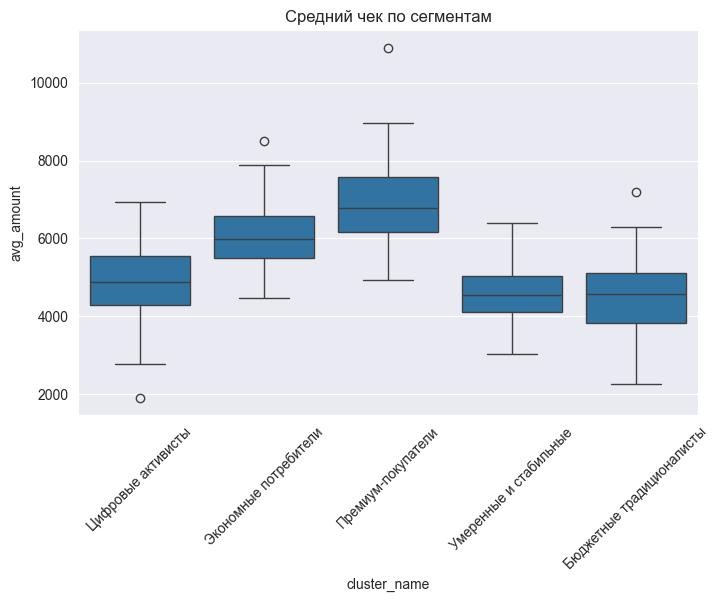

In [15]:
# 🔹 Boxplot среднего чека по сегментам
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='cluster_name', y='avg_amount')
plt.xticks(rotation=45)
plt.title('Средний чек по сегментам')
plt.show()


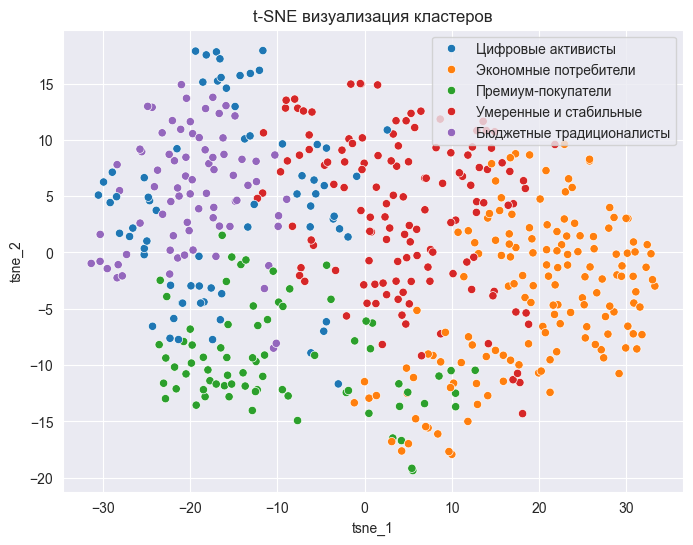

In [16]:
# 🔹 Визуализация t-SNE
X = df.drop(columns=['card_id', 'cluster', 'cluster_name'])
X_scaled = StandardScaler().fit_transform(X)

tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(X_scaled)

df['tsne_1'] = tsne_result[:, 0]
df['tsne_2'] = tsne_result[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='tsne_1', y='tsne_2', hue='cluster_name', palette='tab10')
plt.title('t-SNE визуализация кластеров')
plt.legend(loc='best')
plt.show()


In [17]:
# ✅ Выводы
print("""
- Кластеры различаются по среднему чеку
- t-SNE показывает хорошую разделимость
- Названия сегментов отражают поведенческие паттерны
""")



- Кластеры различаются по среднему чеку
- t-SNE показывает хорошую разделимость
- Названия сегментов отражают поведенческие паттерны

